#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [1]:
#ENTER YOUR CODE HERE
from google.colab import files
uploaded = files.upload()

Saving new_dataset.csv to new_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('new_dataset.csv')
df.head()

,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [10]:
#ENTER YOUR CODE HERE
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stopwords = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s@]', '', text)
    words = text.split()
    filtered = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
df['text_cleaned'] = df['text'].apply(clean_text)
df

,sentiment,text,text_cleaned
0,Negative,@xnausikaax oh no! where did u order from? tha...,@xnausikaax oh u order thats horrible
1,Negative,A great hard training weekend is over. a coup...,great hard training weekend couple days rest l...
2,Negative,"Right, off to work Only 5 hours to go until I...",Right work 5 hours go Im free xD
3,Negative,I am craving for japanese food,craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...,Jean Michel Jarre concert tomorrow gotta work ...
...,...,...,...
9995,Positive,@krystynchong Love to see that!,@krystynchong Love see
9996,Positive,Lovely day spent with the misses. Just loverly,Lovely day spent misses loverly
9997,Positive,@jason_mraz i love the fact that people are es...,@jason_mraz love fact people essentially good ...
9998,Positive,time to shower and tidy then going to go out f...,time shower tidy going go lunch friend lake si...


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [14]:
#ENTER YOUR CODE HERE
def remove_username(text):
  words = text.split()
  filtered = [word for word in words if not word.startswith('@')]
  return ' '.join(filtered)

In [17]:
df['new_text'] = df['text_cleaned'].apply(remove_username)
df

,sentiment,text,text_cleaned,new_text
0,Negative,@xnausikaax oh no! where did u order from? tha...,@xnausikaax oh u order thats horrible,oh u order thats horrible
1,Negative,A great hard training weekend is over. a coup...,great hard training weekend couple days rest l...,great hard training weekend couple days rest l...
2,Negative,"Right, off to work Only 5 hours to go until I...",Right work 5 hours go Im free xD,Right work 5 hours go Im free xD
3,Negative,I am craving for japanese food,craving japanese food,craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...,Jean Michel Jarre concert tomorrow gotta work ...,Jean Michel Jarre concert tomorrow gotta work ...
...,...,...,...,...
9995,Positive,@krystynchong Love to see that!,@krystynchong Love see,Love see
9996,Positive,Lovely day spent with the misses. Just loverly,Lovely day spent misses loverly,Lovely day spent misses loverly
9997,Positive,@jason_mraz i love the fact that people are es...,@jason_mraz love fact people essentially good ...,love fact people essentially good may wrong haha
9998,Positive,time to shower and tidy then going to go out f...,time shower tidy going go lunch friend lake si...,time shower tidy going go lunch friend lake si...


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [18]:
#ENTER YOUR CODE HERE
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
  words = text.split()
  stemmed = [stemmer.stem(word) for word in words]
  return ' '.join(stemmed)

In [21]:
df['stemmed_text'] = df['new_text'].apply(stemming)
df['stemmed_text'].head()

,stemmed_text
0,oh u order that horribl
1,great hard train weekend coupl day rest let lo...
2,right work 5 hour go im free xd
3,crave japanes food
4,jean michel jarr concert tomorrow gotta work 7...


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [22]:
!pip install wordcloud

In [26]:
#ENTER YOUR CODE HERE
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(df[df['sentiment'] == 'Positive']['text'])

positive_wc = WordCloud(width=1600,
    height=800,
    background_color='black',
    colormap='viridis',
    max_words=500,
    contour_width=0,
    collocations=False).generate(positive_text)

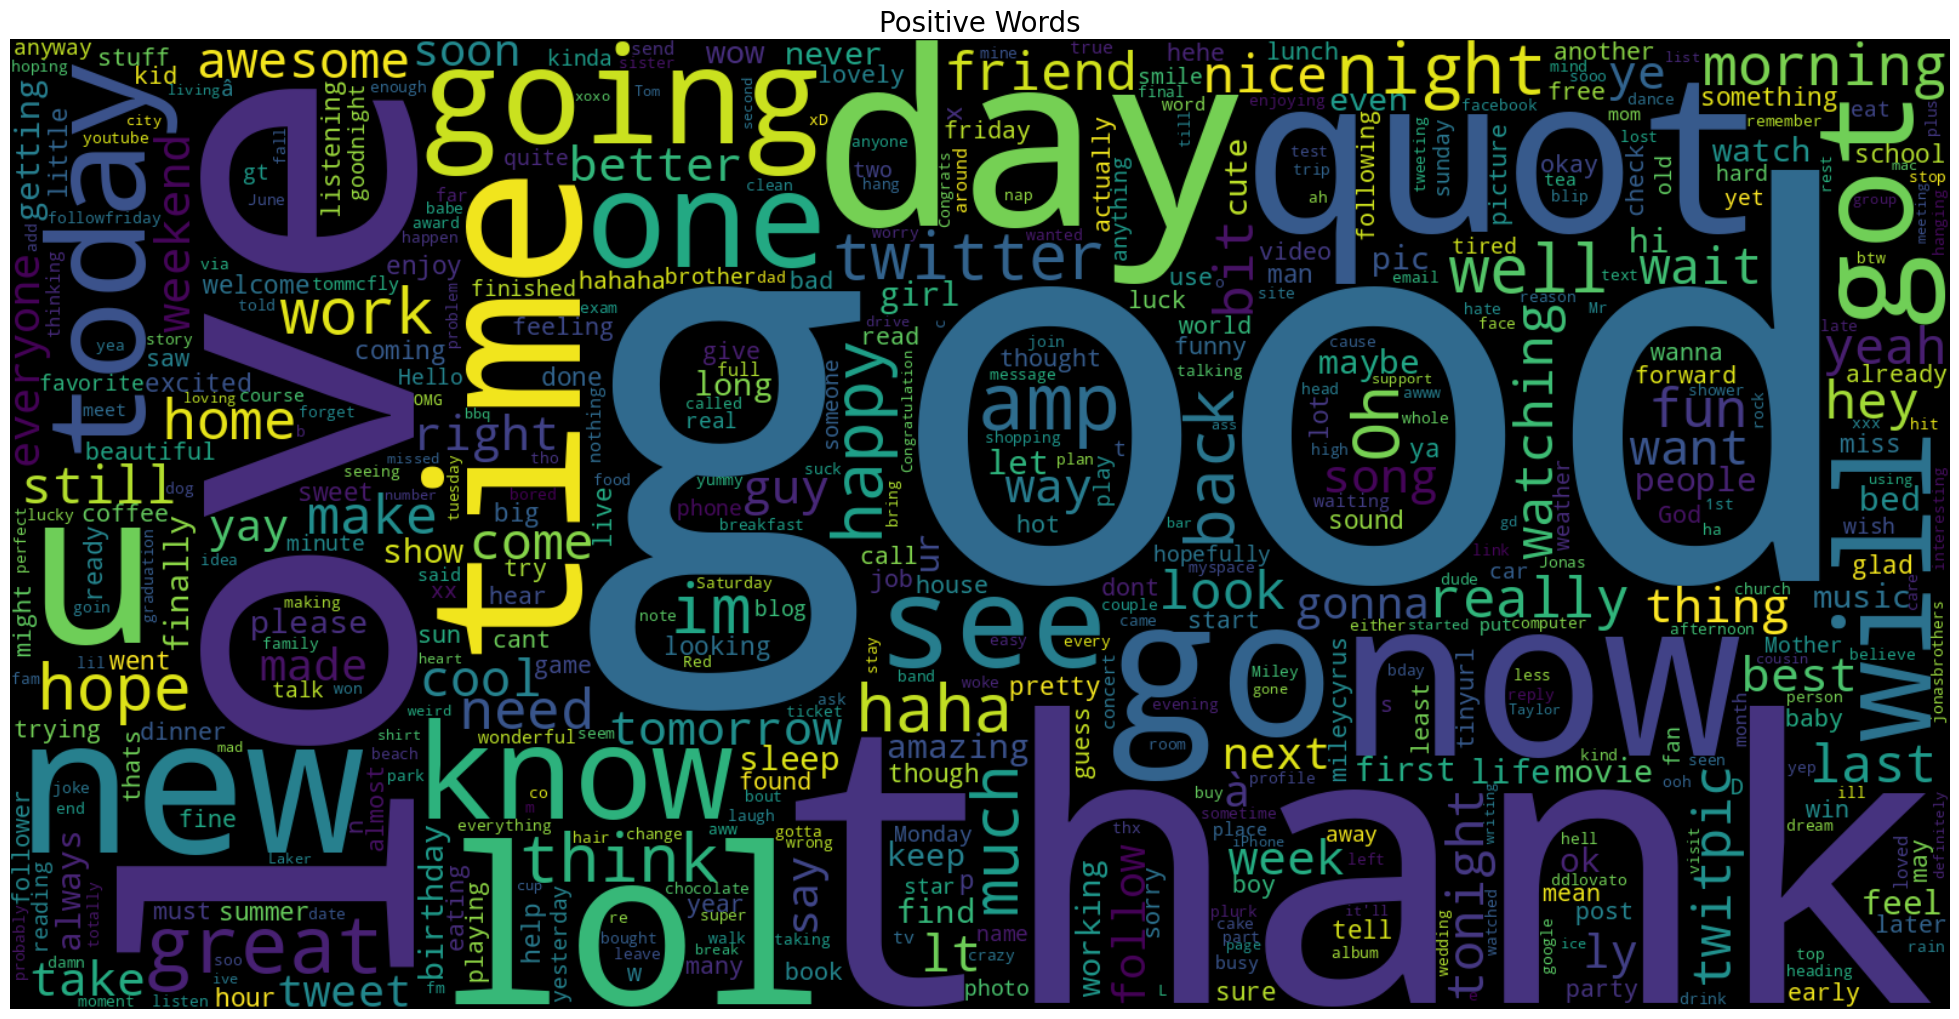

In [27]:
plt.figure(figsize=(20, 10))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Words", fontsize=20)
plt.tight_layout(pad=0)
plt.show()

In [28]:
#ENTER YOUR CODE HERE

negative_text = ' '.join(df[df['sentiment'] == 'Negative']['text'])

negative_wc = WordCloud(width=1600,
    height=800,
    background_color='black',
    colormap='viridis',
    max_words=500,
    contour_width=0,
    collocations=False).generate(negative_text)

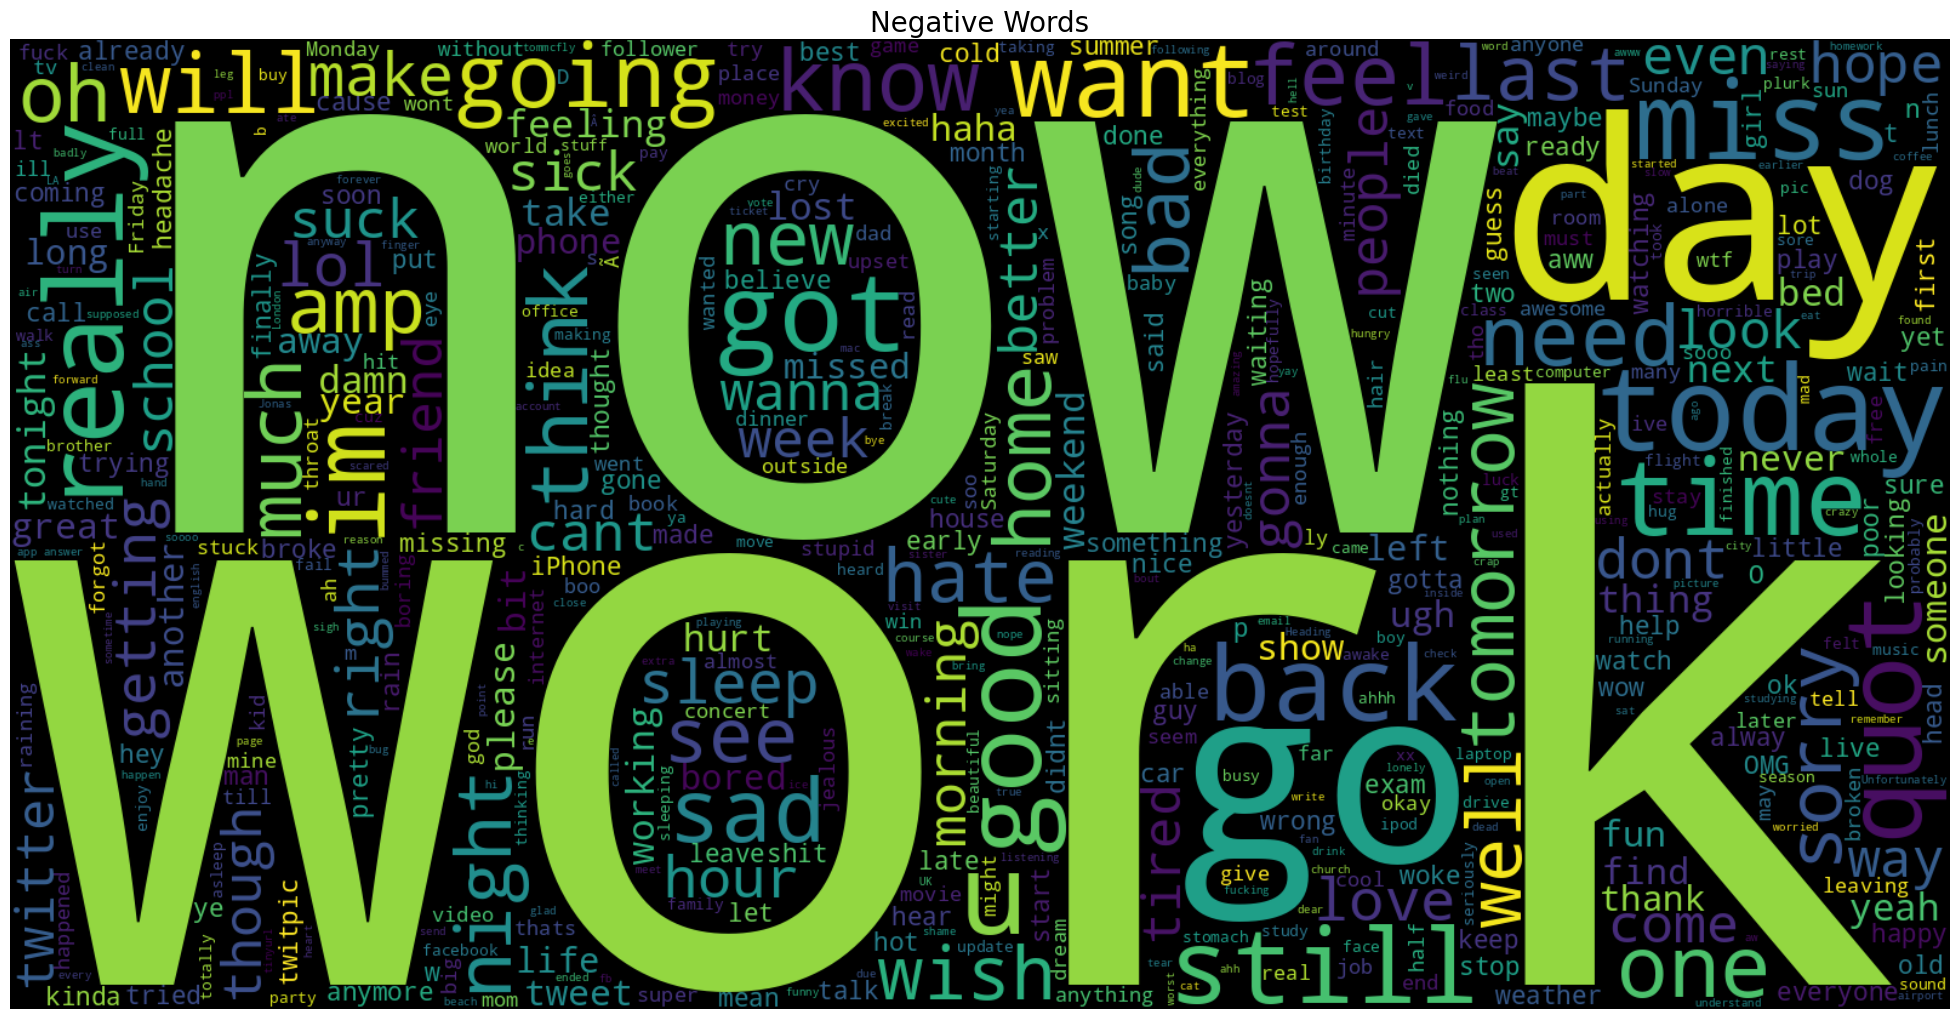

In [29]:
plt.figure(figsize=(20, 10))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Words", fontsize=20)
plt.tight_layout(pad=0)
plt.show()

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [32]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

X = df['stemmed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

In [35]:
print('Training Set Size: ', len(X_train))
print('Test Set Size: ', len(X_test))

Training Set Size:  9000
Test Set Size:  1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [37]:
!pip install keras

In [61]:
#ENTER YOUR CODE HERE
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

vocab_size = len(tokenizer.word_index) + 1

In [62]:
print('Vocabulary Size : ', vocab_size)

Vocabulary Size :  11972


**Now transform the training and testing word sequences.**

In [63]:
#ENTER YOUR CODE HERE
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [64]:
print('Training data:\n', X_train_seq[0], '\n')
print('Testing data:\n', X_test_seq[0], '\n')

Training data:
 [4159, 1534] 

Testing data:
 [7, 47, 1101, 27, 1948, 284] 



**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [70]:
#ENTER YOUR CODE HERE
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq,maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
X_test_pad = pad_sequences(X_test_seq,maxlen=MAX_SEQUENCE_LENGTH, padding='pre')


In [71]:
print('Training data:\n', X_train_pad[0], '\n')
print('Testing data:\n', X_test_pad[0], '\n')

Training data:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 4159 1534] 

Testing data:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    7   47 1101   27 1948  284] 



**Label encode y.**

In [72]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [68]:
print('The training labels:\n', y_train_enc, '\n')
print('The testing labels:\n', y_test_enc, '\n')

The training labels:
 [1 1 0 ... 1 0 0] 

The testing labels:
 [1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1
 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [59]:
import tensorflow as tf
import numpy as np
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-06-15 19:00:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-15 19:00:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-15 19:00:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

In [73]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)


Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [74]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

# ENTER YOUR CODE HERE
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(128, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=sequence_input, outputs=output)

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])


In [75]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 300)        │     3,591,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 25, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 21, 128)        │       192,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,890,865 (14.84 MB)

 Trainable params: 299,265 (1.14 MB)

 Non-trainable params: 3,591,600 (13.70 MB)

**Train the model on the train split, and validate it on the test split.**

In [77]:
#ENTER YOUR CODE HERE
from tensorflow.keras.callbacks import ModelCheckpoint

MODEL_PATH = '/content/best_model.keras'

checkpoint = ModelCheckpoint(
    filepath=MODEL_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max'
)

In [78]:
history = model.fit(
    X_train_pad,
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_pad, y_test_enc),
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.5329 - loss: 0.6895
Epoch 1: val_accuracy improved from -inf to 0.62200, saving model to /content/best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 991ms/step - accuracy: 0.5352 - loss: 0.6890 - val_accuracy: 0.6220 - val_loss: 0.6651
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.6395 - loss: 0.6527
Epoch 2: val_accuracy improved from 0.62200 to 0.64100, saving model to /content/best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6406 - loss: 0.6516 - val_accuracy: 0.6410 - val_loss: 0.6284
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.6725 - loss: 0.6201
Epoch 3: val_accuracy improved from 0.64100 to 0.66800, saving model to /content/best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 831ms/step - accuracy: 0.6728 - loss: 0.6194 - val_accuracy: 0.6680 - val_loss: 0.6127
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6971 - loss: 0.5871
Epoch 4: val_accuracy improved f

**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

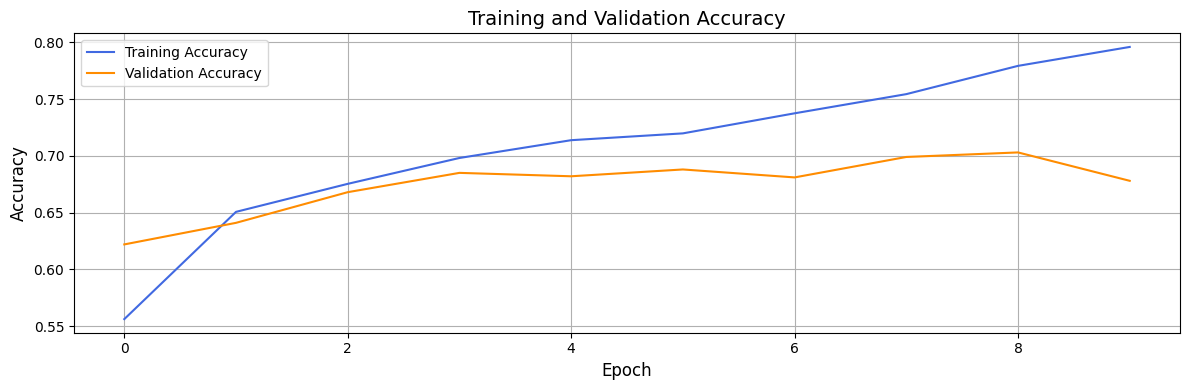

In [79]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='royalblue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#ENTER YOUR CODE HERE

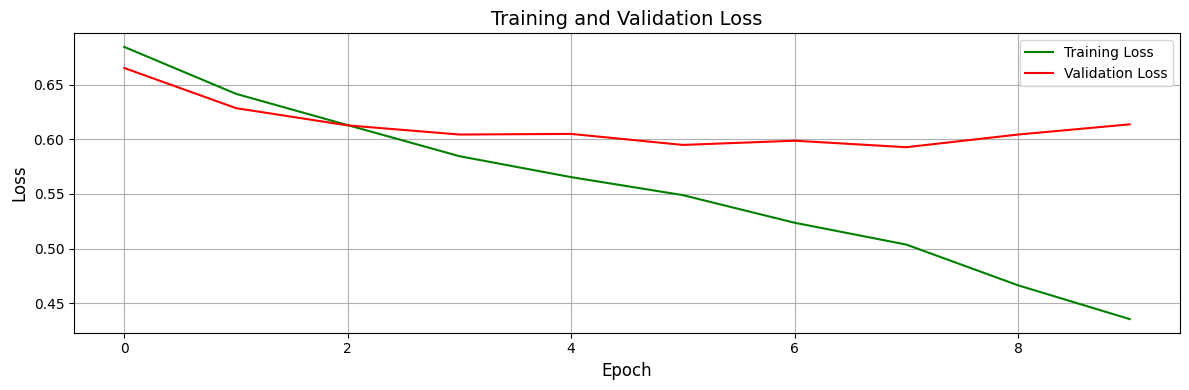

In [80]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

In [81]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_enc, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6937 - loss: 0.5934

Test Accuracy: 0.68


**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

In [82]:
idx = np.random.randint(0, len(X_test_pad))
sample = X_test_pad[idx].reshape(1, -1)

prediction = model.predict(sample)
predicted_label = np.argmax(prediction, axis=1)

true_label = np.argmax(y_test_enc[idx])

print("The chosen sequence is:", X_test_pad[idx])
print("The predicted sentiment is:", ['Positive' if predicted_label[0] == 1 else 'Negative'])
print("The original sentiment is:", ['Positive' if true_label == 1 else 'Negative'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  302    1  252  259   88   60    4 2387   66]
The predicted sentiment is: ['Negative']
The original sentiment is: ['Negative']


In [83]:
#ENTER YOUR CODE HERE

In [84]:
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
decoded_words = [reverse_word_index.get(i, '') for i in X_test_pad[idx] if i != 0]
print("Decoded words:", decoded_words)

Decoded words: ['poor', '<OOV>', 'he', 'okay', 'though', 'didnt', 'get', 'flush', 'way']


**We can try this on a random string as well.**

In [85]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

In [90]:
# Preprocess the input using your existing preprocessing pipeline
cleaned_input = clean_text(input_str)
final_input = stemming(cleaned_input)

# Tokenize and pad the cleaned input
input_seq = tokenizer.texts_to_sequences([final_input])
input_padded = pad_sequences(input_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Predict sentiment
pred = model.predict(input_padded)
predicted_label = label_encoder.inverse_transform((pred > 0.5).astype(int))[0]

print("After removal of stopwords:", cleaned_input)
print("After removal of punctuation:", cleaned_input)
print("After stemming:", final_input)
print("After tokenization:", input_seq)
print("After padding:", input_padded)
print("The predicted sentiment is:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
After removal of stopwords: hate everyone earth
After removal of punctuation: hate everyone earth
After stemming: hate everyon earth
After tokenization: [[77, 125, 2571]]
After padding: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   77  125 2571]]
The predicted sentiment is: Negative


## GOOD JOB!